# Seminar 10. Clustering Hands-on practice

## Similar password detection
In this assignment we will try to detect similar patterns in passwords that people use all over the internet.

The input data is a collection of leaked passwords and it can be downloaded from here https://github.com/ignis-sec/Pwdb-Public/tree/master/wordlists

The task is to try to describe the data in terms of clustering: what are the groups of passwords that look quite similar or have similar logic behind them?

This seminar should be considered as a research: there are no correct answers, no points and no deadlines - just your time and your experiments with clustering algorithms.

We suggest to start with the following steps:
- download the data
- check if your favourite password is in the database
- build a distance matrix using Levenstein distance
- apply DBSCAN
- apply Agglomerative clustering and examine the dendrogram
- experiment with hyperparameters and the distance function
- look for more dependencies and password patterns


In [ ]:
#%pip list

In [2]:
%pip install pylev

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import re

from pylev import levenshtein
from sklearn.cluster import DBSCAN, KMeans

import matplotlib.pyplot as plt

In [5]:
#words_1M = []
#with open("data/ignis-1M.txt", "r") as file:
#    for line in file:
#        words_1M.append(line.strip())

In [9]:
words_1K = []
with open("data/ignis-1K.txt", "r") as file:
    for line in file:
        words_1K.append(line.strip())

In [10]:
words = np.array(words_1M[:1000]).reshape((-1, 1))

Now let's precompute a matrix of pairwise distances between words. Currently we will be using the Levenstein distance.

In [11]:
import numpy as np
from pylev import levenshtein

In [ ]:
## Your code here: Fill matrix with distances

In [13]:
X = np.zeros((words.shape[0], words.shape[0]))
X.shape

(1000, 1000)

In [14]:
for i,x in enumerate(words[:, 0]):
    for j,y in enumerate(words[i:, 0]):
        X[i, i + j] = levenshtein(x, y)
        X[i + j, i] = X[i, i + j]

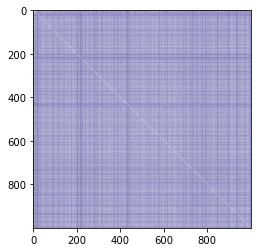

In [15]:
## Visualize it if you'd like to
plt.imshow(X, cmap="Purples")
plt.show()

In [ ]:
eps = # DBSCAN params
min_samples = # DBSCAT params

Fit DBSCAN and collect predicated labels.

In [ ]:
db = DBSCAN(#
labels = db.labels_
len(set(labels))

Describe the clusters:
- how many clusters are there?
- what are there sizes?
- are there any meaningful clusters?

In [ ]:
# YOUR CODE HERE

### Hierarchical clustering

In [ ]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

We will have to condense the distance matrix using `pdist`

In [ ]:
condensed_X = pdist(X)

Choose your type of linkage and cluster the data:

In [ ]:
linkage = hierarchy.linkage(# YOUR CODE HERE)

In [ ]:
linkage.shape

Pay attention to the shape of `linkage` - read the manual. You can write soem code to analyze the `linkage` and track the order how objects were merged into clusters.

Plot the dendrogram.


In [ ]:
plt.figure(figsize=(16, 16))
dn = hierarchy.dendrogram(linkage)
plt.show()

Another way to do the agglomerative clustering. 

Try to apply it and investigate the results:

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
cluster = AgglomerativeClustering(# YOUR CODE HERE)

## Time to be creative

### Creativity challenge #1: Imporved Levenstein Distance

We may consider some operations to be less expensive than the others. To imply these ideas we could use a custom weighted Levenstein Distance.

In [ ]:
# !pip3 install -U strsimpy

In [ ]:
from strsimpy.weighted_levenshtein import WeightedLevenshtein


def insertion_cost(char):
    return 1.0


def deletion_cost(char):
    return 1.0


def substitution_cost(char_a, char_b):
    if char_a == 't' and char_b == 'r':
        return 0.5
    return 1.0

weighted_levenshtein = WeightedLevenshtein(
    substitution_cost_fn=substitution_cost,
    insertion_cost_fn=insertion_cost,
    deletion_cost_fn=deletion_cost)


In [ ]:
print(weighted_levenshtein.distance('Stting1', 'String1'))

In [ ]:
print(weighted_levenshtein.distance('String1', 'Stting1'))

### Creativity challenge #2: Kmeans

Invent a method how to apply Kmeans to this tasks. 
Spoiler: you will have to map the words into some linear space.

*Tip*: after you are done with clustering, use `PCA(k=2)` or `PCA(k=3)` to visualize your clusters in 2-d or 3-d.

In [ ]:
# YOUR CODE HERE